## India: Covid19 Effect on Air Pollution

#### In this exercise, we will be analyzing air pollution levels of India from 2015 to 2020, and then look at how the Covid19 lockdown in March 2020 affected the overall pollution levels across major cities. 

#### The dataset has been sourced from Kaggle: https://www.kaggle.com/rohanrao/air-quality-data-in-india

On March 25th 2020, the central government of India placed a population of more than 1.3 billion people under strict nationwide lockdown, in an effort to arrest the spread of covid19 infections. All non-essential shops, establishments, malls, places of worship etc were shut. Only essential services like electricity, health care and grocery stores were allowed to function.

As a result, since vehicles were no longer plying on roads and most industries were shut, citizens began experiencing better air quality and social media was abuzz with images that compared smog-filled sceneries from the past with clear visibility post-lockdown. Our Objective via this notebook would be to validate these claims using data.

Our dataset provides a large amount of granular data for concentration of major pollutants in India.

Before we proceed, let's understand a bit more about the different pollutants that affect air quality

#### Types of Air Pollutants

Air Pollution refers to the presence of certain substances in the atmosphere that are harmful to human health and other living beings, and may also cause damage to the climate. The different types of pollutants that cause air pollution are broadly classified as: 
    - gases (ammonia, carbon monoxide, sulfur dioxide, nitrous oxides, methane and cfc's)
    - particulates (organic, inorganic)
    - biological molecules

The dataset we have provides city-wise information for the following pollutants: PM2.5, PM10, NO, NO2, NOx, NH3 (ammonia), CO (carbon monoxide), SO2 (sulphur dioxide), O3 (ozone), Benzene, Toluene, Xylene

##### Particulates (PM2.5, PM10)
Particulate Matter (PM) is usually a mixture of solid and liquid paticles that may remain suspended in air. These are broadly categorized into coarse, fine and ultrafine. Coarse particles have a diameter of around 2.5 micrometers to 10 micrometers, and thus tend to settle since they are heavier. Dust and pollen are common examples of such particles. PM2.5 refers to particles that have a diameter less than 2.5 micrometers (100 times thinner than human hair) and thus remain suspended for longer.

Burning fuel, atmospheric chemical reactions and forest fires are major contributors to formation of PM2.5 particles. PM2.5 particles are the primary reason for occurence of smog. Exposure to PM2.5 can have short as well as long term adverse health effects. Short term exposure to these particles can cause irritation to eyes, throat and nose, sneezing and shortness of breath. Long term exposure can cause major respiratory problems such as asthma and chronic bronchitis. Children and elderly are most sensitive to PM2.5. The prescribed standard of PM2.5 is 60 ug/m3 in India.

PM10 particles are found in dust and smoke, and have a diameter less than 10 micrometers. These particles are small enough to get into the throat and lungs, causing symptoms like wheezing, chest tightness or difficulty in breathing.

##### Nitrogen Oxides
Nitrogen Oxides are a group of gases that are relevant to air pollution, out of which the two most common and hazardous are nitric oxide (NO) and nitrogen dioxide (NO2). NOx is the generic term used to refer to this group of gases. The NOx gases are usually produced from the reaction of nitrogen and oxygen during combustion of fuels, especially at high temparatures, such as in cars. Therefore, high vehicular traffic in large cities is a significant cause of air pollution. 

##### Sulphur Dioxide (SO2)
Sulphus dioxide is a toxic gas 

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the City Day Data
city_day_df = pd.read_csv('../Data/city_day.csv')
city_day_df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [3]:
# View basic information
city_day_df.shape

(29531, 16)

In [4]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### 1. Data Preparation and Feature Engineering

In [5]:
print(f"The Data is from {city_day_df['Date'].min()} to {city_day_df['Date'].max()}")

The Data is from 2015-01-01 to 2020-07-01


In [6]:
# The dataset has a lot of missing values. Let's ceate a data frame to show these and their percentage to total
def no_values_dframe(df):
    
    # Get all missing values from the dataset
    no_values = df.isnull().sum()
    
    # Calculate percentage of missing to total
    no_values_percent = np.round((no_values / len(df) * 100), 2)
    
    # Create a dataframe for the above results
    no_values_df = pd.concat([no_values, no_values_percent], axis = 1)
    
    # Rename the Data Frame columns (by default the coulmns are '0', '1'...)
    no_values_df = no_values_df.rename(
        columns = {0: 'Missing Values', 1: '% of Total'})
    
    # Sort the values (descending - % total) and remove the rows that have '0' missing values
    no_values_df = no_values_df[no_values_df.iloc[:,-1] != 0].sort_values('% of Total', ascending=False)
    
    # Return the Data Frame
    return no_values_df

In [7]:
city_no_values = no_values_dframe(city_day_df)
city_no_values.style.background_gradient(cmap='GnBu')

In [8]:
#TO-DO: Add section for imputing missing values (optional)

In [9]:
# Cities in the dataset
cities = city_day_df['City'].value_counts()
print(f'There are {len(cities)} cities in the dataset')
cities

There are 26 cities in the dataset


Bengaluru             2009
Lucknow               2009
Mumbai                2009
Ahmedabad             2009
Chennai               2009
Delhi                 2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: City, dtype: int64

In [10]:
# Convert the Date column to datetime format
city_day_df['Date'] = pd.to_datetime(city_day_df['Date'])
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [11]:
# Extract the year, month from Date and store them in new columns
city_day_df['Year'] = pd.DatetimeIndex(city_day_df['Date']).year
city_day_df['Month'] = pd.DatetimeIndex(city_day_df['Date']).month
city_day_df.head()

City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  Year  Month  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015      1  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015      1  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015      1  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015      1  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015      1

In [12]:
# Combine Benzene, Toluene and Xylene into one column
city_day_df['BTX'] = city_day_df['Benzene'] + city_day_df['Toluene'] + city_day_df['Xylene']

# Drop the columns that are not required
city_day_df.drop(['Benzene', 'Toluene', 'Xylene'], axis = 1);

In [13]:
# Create a new list 'pollutants'
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'BTX']

In [14]:
# Set Date as the index for the data frame
city_day_df.set_index('Date', inplace=True)

### 2. Data Visualization

#### 2.1 Visualize Yearly Pollutants Data

In [15]:
# Create a function to show pollutant-wise yearly plot
def show_year_plot(df, value, c):
    ax = df[value].plot(marker='.', c=c, linestyle='None', figsize=(15,5), alpha=0.3, legend=True)
    ax.set_xlabel('Year')
    ax.set_ylabel('ug / m3')

In [16]:
# Create a copy of the main data frame
df = city_day_df.copy()

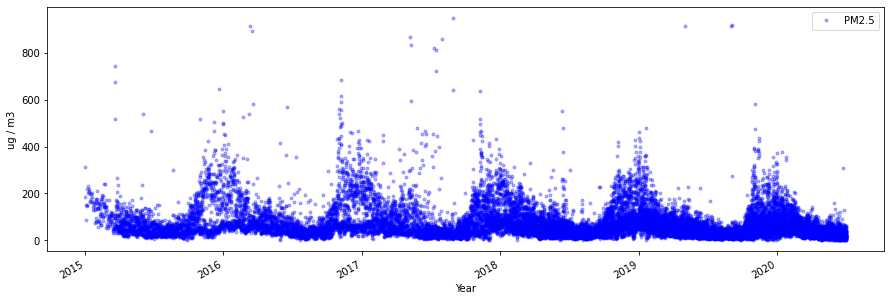

In [17]:
# Show plot for PM2.5
show_year_plot(df, 'PM2.5', 'b')

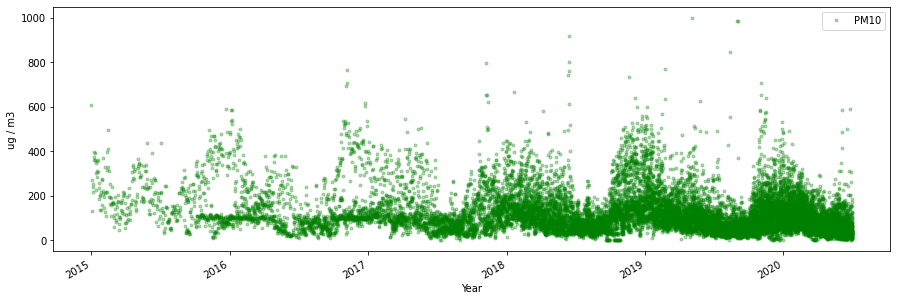

In [18]:
# Show plot for PM10
show_year_plot(df, 'PM10', 'g')

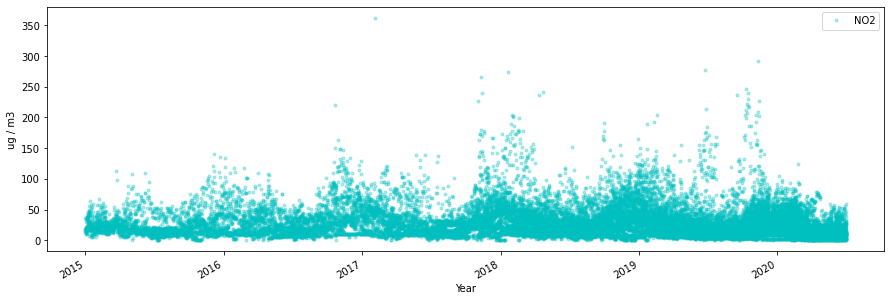

In [19]:
# Show plot for NO2
show_year_plot(df, 'NO2', 'c')

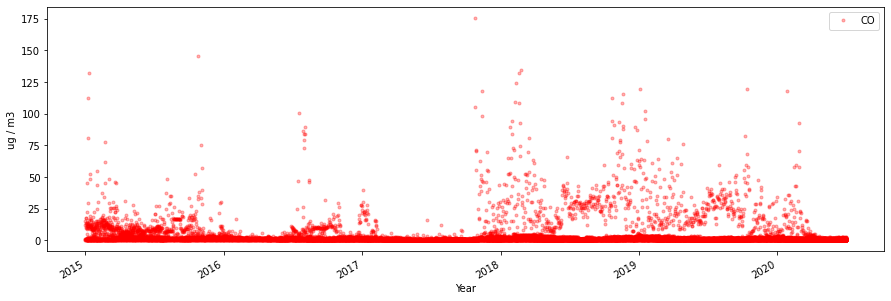

In [20]:
# Show plot for CO
show_year_plot(df, 'CO', 'r')

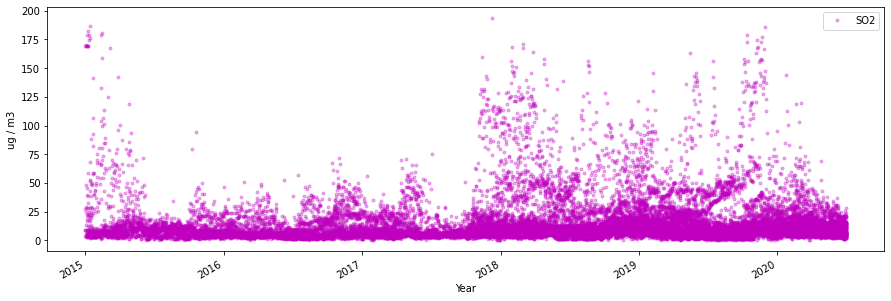

In [21]:
# Show plot for SO2
show_year_plot(df, 'SO2', 'm')

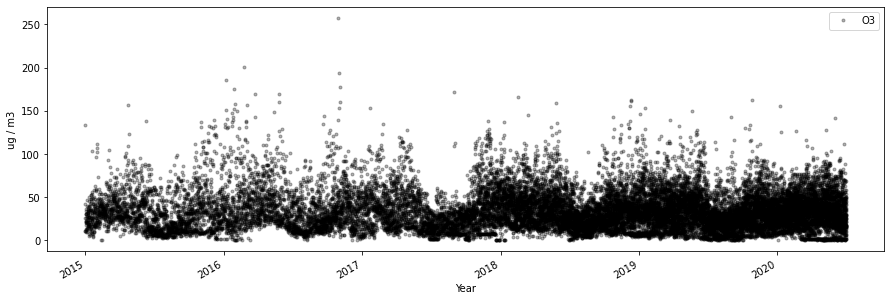

In [22]:
# Show plot for O3
show_year_plot(df, 'O3', 'k')

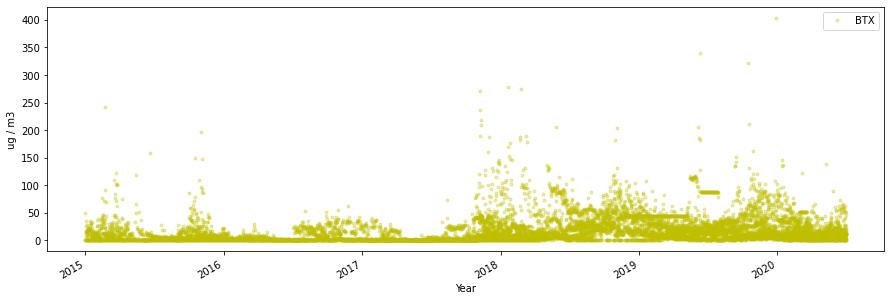

In [23]:
# Show plot for BTX
show_year_plot(df, 'BTX', 'y')

#### 2.2 Visualize Monthly (Seasonal) and Yearly (Trends) Distribution

In [24]:
# Define a function to show the plots
def show_trend_plot(value):
    sns.set_style('darkgrid')
    fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi=80)
    
    sns.boxplot(x='Year', y=value, data=city_day_df, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=city_day_df, ax=axes[1])

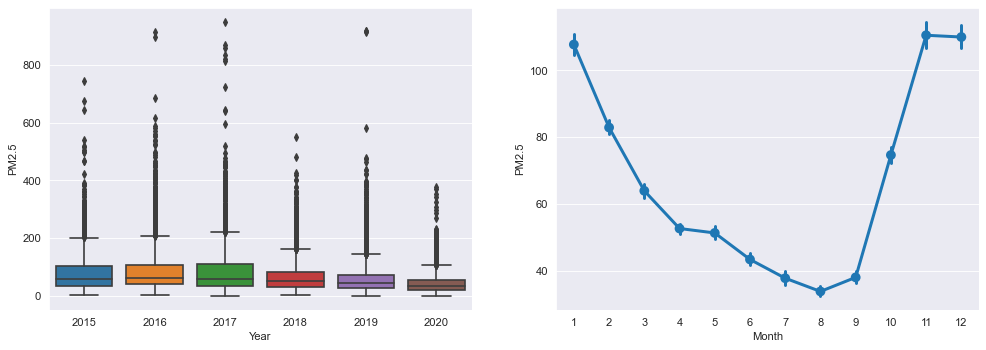

In [25]:
# Show plot for PM2.5
show_trend_plot('PM2.5')

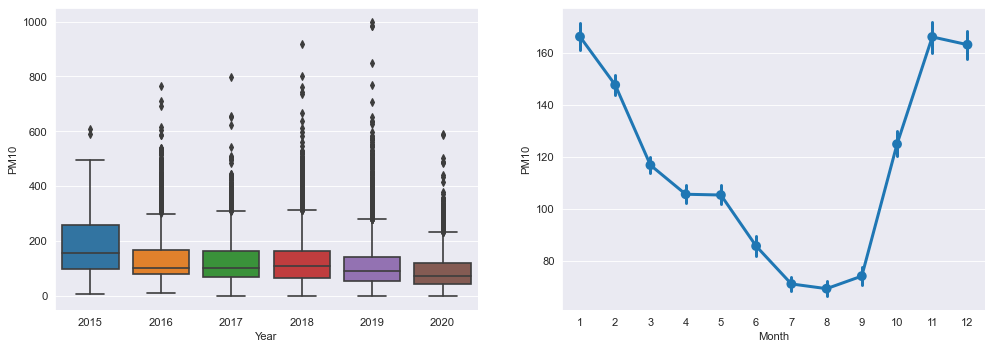

In [26]:
# Show plot for PM10
show_trend_plot('PM10')

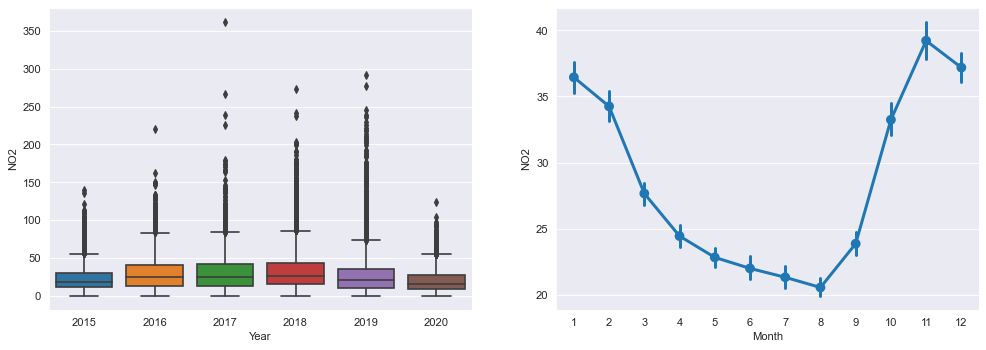

In [27]:
# Show plot for NO2
show_trend_plot('NO2')

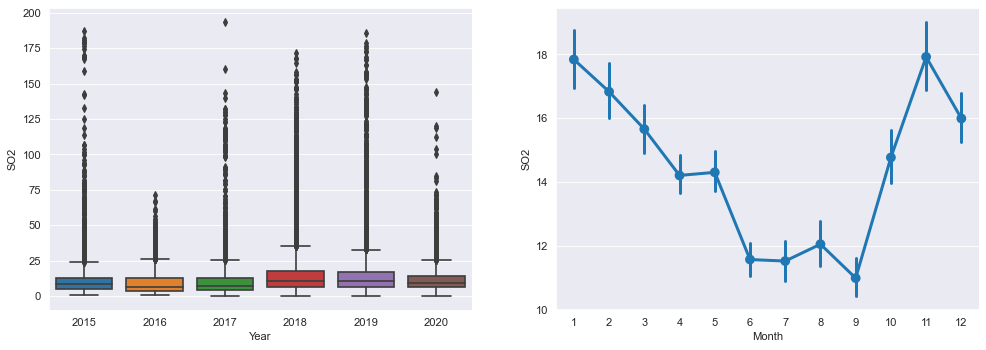

In [28]:
# Show plot for SO2
show_trend_plot('SO2')

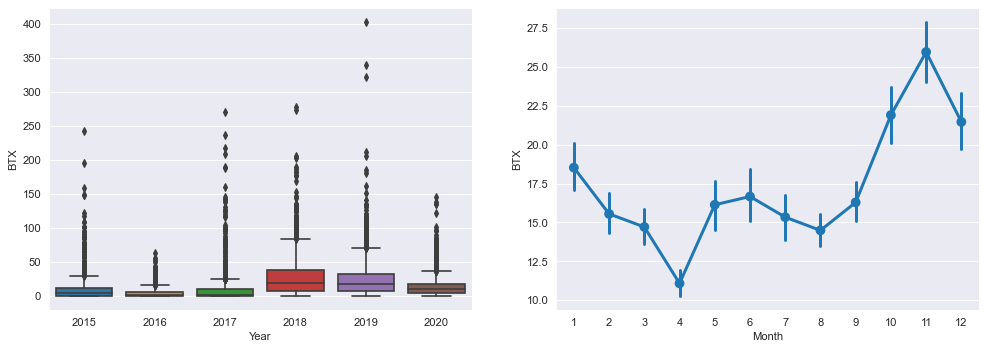

In [29]:
# Show plot for BTX
show_trend_plot('BTX')

### 2.3 The most polluted Cities of India

In [30]:
# Reset index for main data frame
city_day_df = city_day_df.reset_index()

In [31]:
# Create two functions - one to create a table of top 10 polluted cities and second to show a barplot
# Create a copy of the data frame first
df = city_day_df.copy()

In [32]:
def top_cities_df(pollutant):
    df1 = df[[pollutant, 'City']].groupby(['City']).mean().sort_values(by=pollutant, ascending=False).reset_index()
    return df1[:10].style.background_gradient(cmap='Oranges')

In [33]:
# Import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [34]:
def top_cities_bargraph(pollutant):
    df2 = df[[pollutant, 'City']].groupby(['City']).mean().sort_values(by=pollutant, ascending=False).reset_index()
    df3 = df2[:10]
    fig = make_subplots(
        rows=1, cols=1,
        column_width=[2],
        subplot_titles=(pollutant, ""))

    fig.add_trace(go.Bar(x=df3['City'], y=df3[pollutant], marker=dict(color=df3[pollutant], coloraxis="coloraxis")), 1, 1)
    fig.update_layout(coloraxis=dict(colorscale='Oranges'), showlegend=False,plot_bgcolor='white')
    fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="Cities")
    fig.update_yaxes(title_text="ug / m3", row=1, col=1)
    fig.show()

In [35]:
# Show Table and Graph for PM2.5
pm25 = top_cities_df('PM2.5')
pm25

In [36]:
top_cities_bargraph('PM2.5')

In [37]:
# Show table and graph for PM10
pm10 = top_cities_df('PM10')
pm10

In [38]:
top_cities_bargraph('PM10')

In [39]:
# Show table and graph for CO
co = top_cities_df('CO')
co

In [40]:
top_cities_bargraph('CO')

In [41]:
# Show table and graph for NO2
no2 = top_cities_df('NO2')
no2

In [42]:
top_cities_bargraph('NO2')

In [43]:
# Show table and graph for SO2
so2 = top_cities_df('SO2')
so2

In [44]:
top_cities_bargraph('SO2')

### 3. Effect of Covid19 Lockdown on AQI

#### 3.1 What is AQI?

#### 3.2 AQI across Indian Cities

In [45]:
# Cities that we will study - Ahmedabad, Delhi, Bengaluru, Hyderabad, Chennai, Patna, Mumbai
# Create a new dataframe that contains data after 1st January 2019
dated_city_df = city_day_df[city_day_df['Date'] >= '2019-01-01']
dated_city_df

Date           City   PM2.5   PM10      NO     NO2     NOx    NH3  \
1461  2019-01-01      Ahmedabad  110.71    NaN   63.03  111.56  100.04    NaN   
1462  2019-01-02      Ahmedabad  147.57    NaN   59.56  107.46  129.87    NaN   
1463  2019-01-03      Ahmedabad  131.50    NaN  119.68   75.82   88.04    NaN   
1464  2019-01-04      Ahmedabad  102.12    NaN   57.92   95.29   54.93    NaN   
1465  2019-01-05      Ahmedabad  115.00    NaN   63.86  111.04   61.99    NaN   
...          ...            ...     ...    ...     ...     ...     ...    ...   
29526 2020-06-27  Visakhapatnam   15.02  50.94    7.68   25.06   19.54  12.47   
29527 2020-06-28  Visakhapatnam   24.38  74.09    3.42   26.06   16.53  11.99   
29528 2020-06-29  Visakhapatnam   22.91  65.73    3.45   29.53   18.33  10.71   
29529 2020-06-30  Visakhapatnam   16.64  49.97    4.05   29.26   18.80  10.03   
29530 2020-07-01  Visakhapatnam   15.00  66.00    0.40   26.85   14.05   5.20   

           CO    SO2     O3  Benzene  Toluene  Xylene     AQI    AQI_Bucket  \
1461    63.03  80.15  57.12     4.08    32.33    6.93  1474.0        Severe   
1462    59.56  47.70  48.23     4.10    32.34    6.99  1246.0        Severe   
1463   119.68  55.29  43.25     4.09    32.42    7.00  1719.0        Severe   
1464    57.92  69.02  51.71     4.09    32.38    6.98  1264.0        Severe   
1465    63.86  86.65  59.25     4.12    32.43    6.97  1127.0        Severe   
...       ...    ...    ...      ...      ...     ...     ...           ...   
29526    0.47   8.55  23.30     2.24    12.07    0.73    41.0          Good   
29527    0.52  12.72  30.14     0.74     2.21    0.38    70.0  Satisfactory   
29528    0.48   8.42  30.96     0.01     0.01    0.00    68.0  Satisfactory   
29529    0.52   9.84  28.30     0.00     0.00    0.00    54.0  Satisfactory   
29530    0.59   2.10  17.05      NaN      NaN     NaN    50.0          Good   

       Year  Month    BTX  
1461   2019      1  43.34  
1462   2019      1  43.43  
1463   2019      1  43.51  
1464   2019      1  43.45  
1465   2019      1  43.52  
...     ...    ...    ...  
29526  2020      6  15.04  
29527  2020      6   3.33  
29528  2020      6   0.02  
29529  2020      6   0.00  
29530  2020      7    NaN  

[12092 rows x 19 columns]

In [46]:
# Create a list of cities
cities = ['Ahmedabad', 'Delhi', 'Bengaluru', 'Chennai', 'Hyderabad', 'Mumbai', 'Patna']

In [47]:
# Create an AQI Dataframe
AQI = dated_city_df[dated_city_df.City.isin(cities)][['Date', 'City', 'AQI', 'AQI_Bucket', 'Year', 'Month']]
AQI

Date       City     AQI    AQI_Bucket  Year  Month
1461  2019-01-01  Ahmedabad  1474.0        Severe  2019      1
1462  2019-01-02  Ahmedabad  1246.0        Severe  2019      1
1463  2019-01-03  Ahmedabad  1719.0        Severe  2019      1
1464  2019-01-04  Ahmedabad  1264.0        Severe  2019      1
1465  2019-01-05  Ahmedabad  1127.0        Severe  2019      1
...          ...        ...     ...           ...   ...    ...
25717 2020-06-27      Patna    65.0  Satisfactory  2020      6
25718 2020-06-28      Patna    82.0  Satisfactory  2020      6
25719 2020-06-29      Patna    88.0  Satisfactory  2020      6
25720 2020-06-30      Patna    93.0  Satisfactory  2020      6
25721 2020-07-01      Patna    98.0  Satisfactory  2020      7

[3836 rows x 6 columns]

In [48]:
# Divide the AQI Dataset into two - one for 2019, another for 2020
AQI = AQI.set_index('Date')
AQI

City     AQI    AQI_Bucket  Year  Month
Date                                                    
2019-01-01  Ahmedabad  1474.0        Severe  2019      1
2019-01-02  Ahmedabad  1246.0        Severe  2019      1
2019-01-03  Ahmedabad  1719.0        Severe  2019      1
2019-01-04  Ahmedabad  1264.0        Severe  2019      1
2019-01-05  Ahmedabad  1127.0        Severe  2019      1
...               ...     ...           ...   ...    ...
2020-06-27      Patna    65.0  Satisfactory  2020      6
2020-06-28      Patna    82.0  Satisfactory  2020      6
2020-06-29      Patna    88.0  Satisfactory  2020      6
2020-06-30      Patna    93.0  Satisfactory  2020      6
2020-07-01      Patna    98.0  Satisfactory  2020      7

[3836 rows x 5 columns]

In [49]:
AQI_2019 = AQI.loc['2019-01-01':'2019-12-31']
AQI_2020 = AQI.loc['2020-01-01':'2020-06-30']

In [50]:
AQI_2019 = AQI_2019.reset_index()
AQI_2020 = AQI_2020.reset_index()

###### 3.2.1 AQI of Bengaluru

In [51]:
# Extract Bengaluru data for 2019 and 2020
blr_2019 = AQI_2019[AQI_2019['City'] == 'Bengaluru']
blr_2019

Date       City    AQI    AQI_Bucket  Year  Month
365 2019-01-01  Bengaluru  128.0      Moderate  2019      1
366 2019-01-02  Bengaluru  103.0      Moderate  2019      1
367 2019-01-03  Bengaluru  101.0      Moderate  2019      1
368 2019-01-04  Bengaluru  106.0      Moderate  2019      1
369 2019-01-05  Bengaluru  104.0      Moderate  2019      1
..         ...        ...    ...           ...   ...    ...
725 2019-12-27  Bengaluru   98.0  Satisfactory  2019     12
726 2019-12-28  Bengaluru   82.0  Satisfactory  2019     12
727 2019-12-29  Bengaluru   80.0  Satisfactory  2019     12
728 2019-12-30  Bengaluru   93.0  Satisfactory  2019     12
729 2019-12-31  Bengaluru   97.0  Satisfactory  2019     12

[365 rows x 6 columns]

In [52]:
blr_2020 = AQI_2020[AQI_2020['City'] == 'Bengaluru']
blr_2020

Date       City    AQI    AQI_Bucket  Year  Month
182 2020-01-01  Bengaluru   82.0  Satisfactory  2020      1
183 2020-01-02  Bengaluru   81.0  Satisfactory  2020      1
184 2020-01-03  Bengaluru   85.0  Satisfactory  2020      1
185 2020-01-04  Bengaluru   95.0  Satisfactory  2020      1
186 2020-01-05  Bengaluru  118.0      Moderate  2020      1
..         ...        ...    ...           ...   ...    ...
359 2020-06-26  Bengaluru   58.0  Satisfactory  2020      6
360 2020-06-27  Bengaluru   51.0  Satisfactory  2020      6
361 2020-06-28  Bengaluru   61.0  Satisfactory  2020      6
362 2020-06-29  Bengaluru   65.0  Satisfactory  2020      6
363 2020-06-30  Bengaluru   63.0  Satisfactory  2020      6

[182 rows x 6 columns]

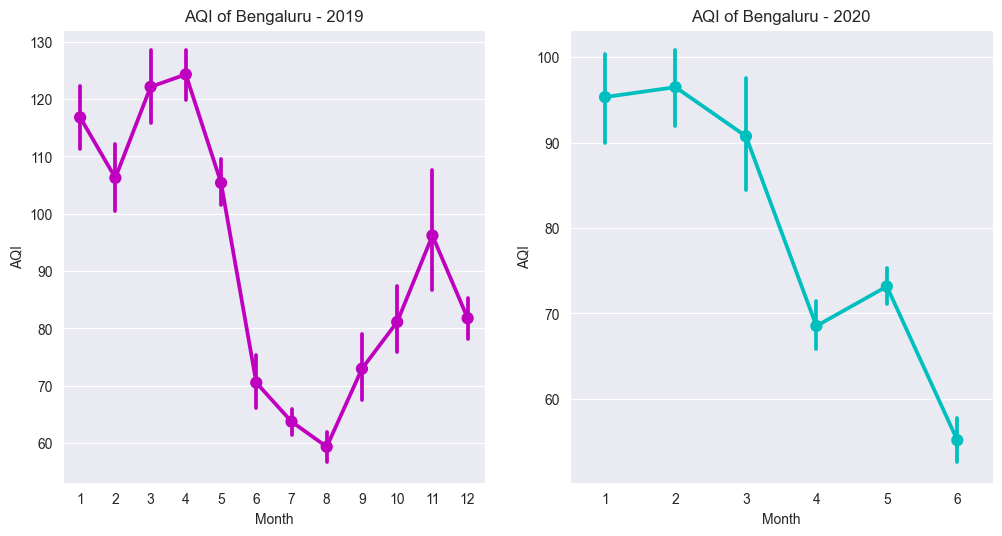

In [53]:
# Let's plot AQI data for Blr
fig, axes = plt.subplots(1, 2, figsize=(12,6), dpi=100)
axes[0].set_title('AQI of Bengaluru - 2019')
axes[1].set_title('AQI of Bengaluru - 2020')

sns.pointplot(x='Month', y='AQI', data=blr_2019,ax= axes[0], color='m')
sns.pointplot(x='Month', y='AQI', data=blr_2020, ax=axes[1], color='c');

##### 3.2.2 AQI of Ahmedabad

In [54]:
ahm_2019 = AQI_2019[AQI_2019['City'] == 'Ahmedabad']
ahm_2019

Date       City     AQI AQI_Bucket  Year  Month
0   2019-01-01  Ahmedabad  1474.0     Severe  2019      1
1   2019-01-02  Ahmedabad  1246.0     Severe  2019      1
2   2019-01-03  Ahmedabad  1719.0     Severe  2019      1
3   2019-01-04  Ahmedabad  1264.0     Severe  2019      1
4   2019-01-05  Ahmedabad  1127.0     Severe  2019      1
..         ...        ...     ...        ...   ...    ...
360 2019-12-27  Ahmedabad   381.0  Very Poor  2019     12
361 2019-12-28  Ahmedabad   288.0       Poor  2019     12
362 2019-12-29  Ahmedabad   398.0  Very Poor  2019     12
363 2019-12-30  Ahmedabad   703.0     Severe  2019     12
364 2019-12-31  Ahmedabad   385.0  Very Poor  2019     12

[365 rows x 6 columns]

In [55]:
ahm_2020 = AQI_2020[AQI_2020['City'] == 'Ahmedabad']
ahm_2020

Date       City    AQI    AQI_Bucket  Year  Month
0   2020-01-01  Ahmedabad  216.0          Poor  2020      1
1   2020-01-02  Ahmedabad  162.0      Moderate  2020      1
2   2020-01-03  Ahmedabad  220.0          Poor  2020      1
3   2020-01-04  Ahmedabad  254.0          Poor  2020      1
4   2020-01-05  Ahmedabad  255.0          Poor  2020      1
..         ...        ...    ...           ...   ...    ...
177 2020-06-26  Ahmedabad   93.0  Satisfactory  2020      6
178 2020-06-27  Ahmedabad   92.0  Satisfactory  2020      6
179 2020-06-28  Ahmedabad   82.0  Satisfactory  2020      6
180 2020-06-29  Ahmedabad   74.0  Satisfactory  2020      6
181 2020-06-30  Ahmedabad   98.0  Satisfactory  2020      6

[182 rows x 6 columns]

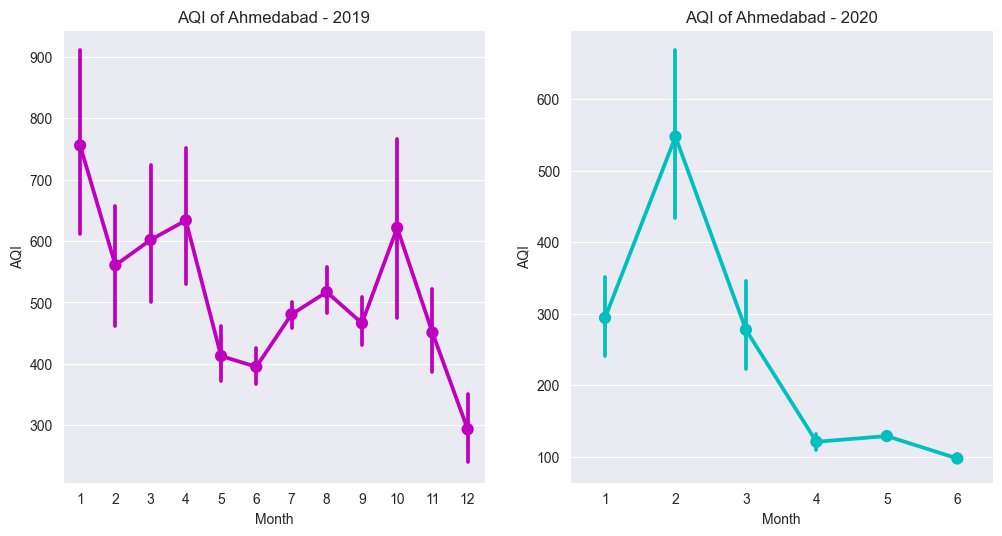

In [56]:
# Let's plot AQI data for Ahmedabad
fig,axes = plt.subplots(1,2,figsize=(12,6), dpi=100)
axes[0].set_title('AQI of Ahmedabad - 2019')
axes[1].set_title('AQI of Ahmedabad - 2020')

sns.pointplot(x='Month', y='AQI', data=ahm_2019,ax= axes[0], color='m')
sns.pointplot(x='Month', y='AQI', data=ahm_2020, ax=axes[1], color='c');

##### 3.2.3 AQI of Hyderabad

In [57]:
hyd_2019 = AQI_2019[AQI_2019['City'] == 'Hyderabad']
hyd_2019

Date       City    AQI AQI_Bucket  Year  Month
1460 2019-01-01  Hyderabad  132.0   Moderate  2019      1
1461 2019-01-02  Hyderabad  133.0   Moderate  2019      1
1462 2019-01-03  Hyderabad  141.0   Moderate  2019      1
1463 2019-01-04  Hyderabad  142.0   Moderate  2019      1
1464 2019-01-05  Hyderabad  148.0   Moderate  2019      1
...         ...        ...    ...        ...   ...    ...
1820 2019-12-27  Hyderabad  119.0   Moderate  2019     12
1821 2019-12-28  Hyderabad  130.0   Moderate  2019     12
1822 2019-12-29  Hyderabad  158.0   Moderate  2019     12
1823 2019-12-30  Hyderabad  143.0   Moderate  2019     12
1824 2019-12-31  Hyderabad  107.0   Moderate  2019     12

[365 rows x 6 columns]

In [58]:
hyd_2020 = AQI_2020[AQI_2020['City'] == 'Hyderabad']
hyd_2020

Date       City    AQI    AQI_Bucket  Year  Month
728 2020-01-01  Hyderabad   82.0  Satisfactory  2020      1
729 2020-01-02  Hyderabad   64.0  Satisfactory  2020      1
730 2020-01-03  Hyderabad   64.0  Satisfactory  2020      1
731 2020-01-04  Hyderabad   87.0  Satisfactory  2020      1
732 2020-01-05  Hyderabad  112.0      Moderate  2020      1
..         ...        ...    ...           ...   ...    ...
905 2020-06-26  Hyderabad   52.0  Satisfactory  2020      6
906 2020-06-27  Hyderabad   58.0  Satisfactory  2020      6
907 2020-06-28  Hyderabad   49.0          Good  2020      6
908 2020-06-29  Hyderabad   47.0          Good  2020      6
909 2020-06-30  Hyderabad   46.0          Good  2020      6

[182 rows x 6 columns]

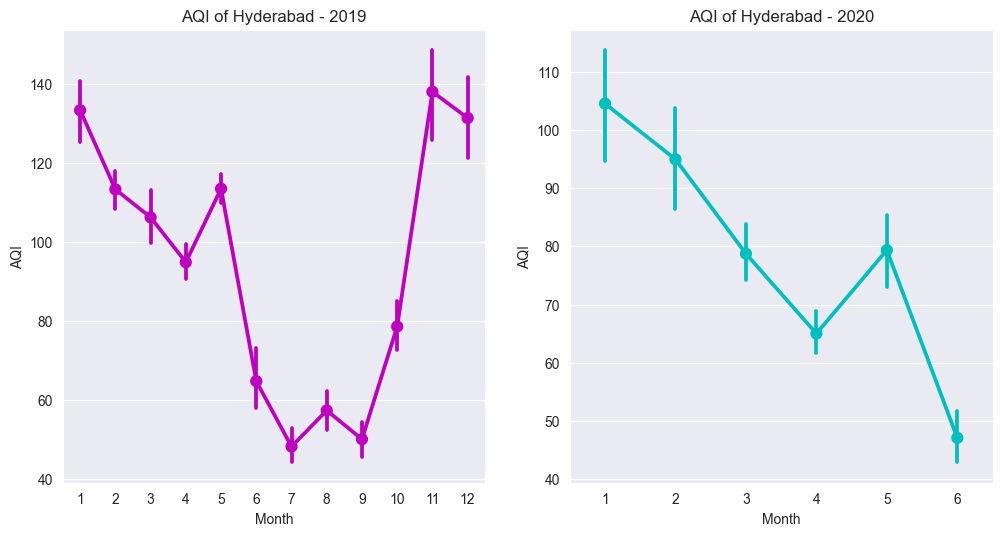

In [59]:
# Let's plot AQI for Hyderabad
fig,axes = plt.subplots(1,2,figsize=(12,6), dpi=100)
axes[0].set_title('AQI of Hyderabad - 2019')
axes[1].set_title('AQI of Hyderabad - 2020')

sns.pointplot(x='Month', y='AQI', data=hyd_2019,ax= axes[0], color='m')
sns.pointplot(x='Month', y='AQI', data=hyd_2020, ax=axes[1], color='c');

##### 3.2.4 AQI of Mumbai

In [60]:
mum_2019 = AQI_2019[AQI_2019['City'] == 'Mumbai']
mum_2019

Date    City    AQI AQI_Bucket  Year  Month
1825 2019-01-01  Mumbai  181.0   Moderate  2019      1
1826 2019-01-02  Mumbai  175.0   Moderate  2019      1
1827 2019-01-03  Mumbai  239.0       Poor  2019      1
1828 2019-01-04  Mumbai  221.0       Poor  2019      1
1829 2019-01-05  Mumbai  180.0   Moderate  2019      1
...         ...     ...    ...        ...   ...    ...
2185 2019-12-27  Mumbai  184.0   Moderate  2019     12
2186 2019-12-28  Mumbai  167.0   Moderate  2019     12
2187 2019-12-29  Mumbai  160.0   Moderate  2019     12
2188 2019-12-30  Mumbai  181.0   Moderate  2019     12
2189 2019-12-31  Mumbai  159.0   Moderate  2019     12

[365 rows x 6 columns]

In [61]:
mum_2020 = AQI_2020[AQI_2020['City'] == 'Mumbai']
mum_2020

Date    City    AQI    AQI_Bucket  Year  Month
910  2020-01-01  Mumbai  194.0      Moderate  2020      1
911  2020-01-02  Mumbai  260.0          Poor  2020      1
912  2020-01-03  Mumbai  221.0          Poor  2020      1
913  2020-01-04  Mumbai  225.0          Poor  2020      1
914  2020-01-05  Mumbai  229.0          Poor  2020      1
...         ...     ...    ...           ...   ...    ...
1087 2020-06-26  Mumbai   57.0  Satisfactory  2020      6
1088 2020-06-27  Mumbai   64.0  Satisfactory  2020      6
1089 2020-06-28  Mumbai   64.0  Satisfactory  2020      6
1090 2020-06-29  Mumbai   54.0  Satisfactory  2020      6
1091 2020-06-30  Mumbai   54.0  Satisfactory  2020      6

[182 rows x 6 columns]

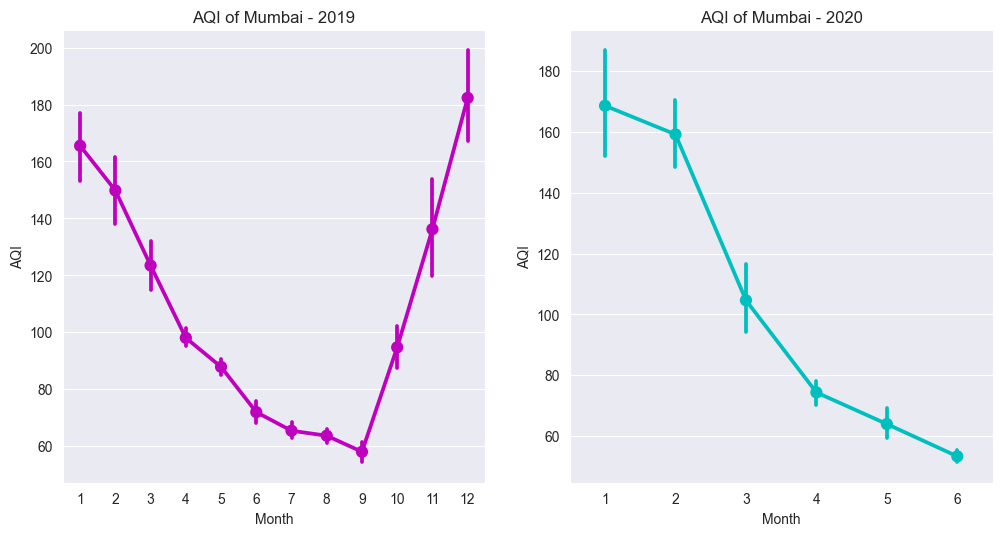

In [62]:
# Let's plot AQI for Mumbai
fig,axes = plt.subplots(1,2,figsize=(12,6), dpi=100)
axes[0].set_title('AQI of Mumbai - 2019')
axes[1].set_title('AQI of Mumbai - 2020')

sns.pointplot(x='Month', y='AQI', data=mum_2019,ax= axes[0], color='m')
sns.pointplot(x='Month', y='AQI', data=mum_2020, ax=axes[1], color='c');

##### 3.2.5 AQI of Delhi

In [63]:
del_2019 = AQI_2019[AQI_2019['City'] == 'Delhi']
del_2019

Date   City    AQI AQI_Bucket  Year  Month
1095 2019-01-01  Delhi  475.0     Severe  2019      1
1096 2019-01-02  Delhi  501.0     Severe  2019      1
1097 2019-01-03  Delhi  537.0     Severe  2019      1
1098 2019-01-04  Delhi  432.0     Severe  2019      1
1099 2019-01-05  Delhi  440.0     Severe  2019      1
...         ...    ...    ...        ...   ...    ...
1455 2019-12-27  Delhi  372.0  Very Poor  2019     12
1456 2019-12-28  Delhi  425.0     Severe  2019     12
1457 2019-12-29  Delhi  455.0     Severe  2019     12
1458 2019-12-30  Delhi  506.0     Severe  2019     12
1459 2019-12-31  Delhi  417.0     Severe  2019     12

[365 rows x 6 columns]

In [64]:
del_2020 = AQI_2020[AQI_2020['City'] == 'Delhi']
del_2020

Date   City    AQI AQI_Bucket  Year  Month
546 2020-01-01  Delhi  492.0     Severe  2020      1
547 2020-01-02  Delhi  485.0     Severe  2020      1
548 2020-01-03  Delhi  426.0     Severe  2020      1
549 2020-01-04  Delhi  366.0  Very Poor  2020      1
550 2020-01-05  Delhi  354.0  Very Poor  2020      1
..         ...    ...    ...        ...   ...    ...
723 2020-06-26  Delhi  104.0   Moderate  2020      6
724 2020-06-27  Delhi  112.0   Moderate  2020      6
725 2020-06-28  Delhi  196.0   Moderate  2020      6
726 2020-06-29  Delhi  233.0       Poor  2020      6
727 2020-06-30  Delhi  114.0   Moderate  2020      6

[182 rows x 6 columns]

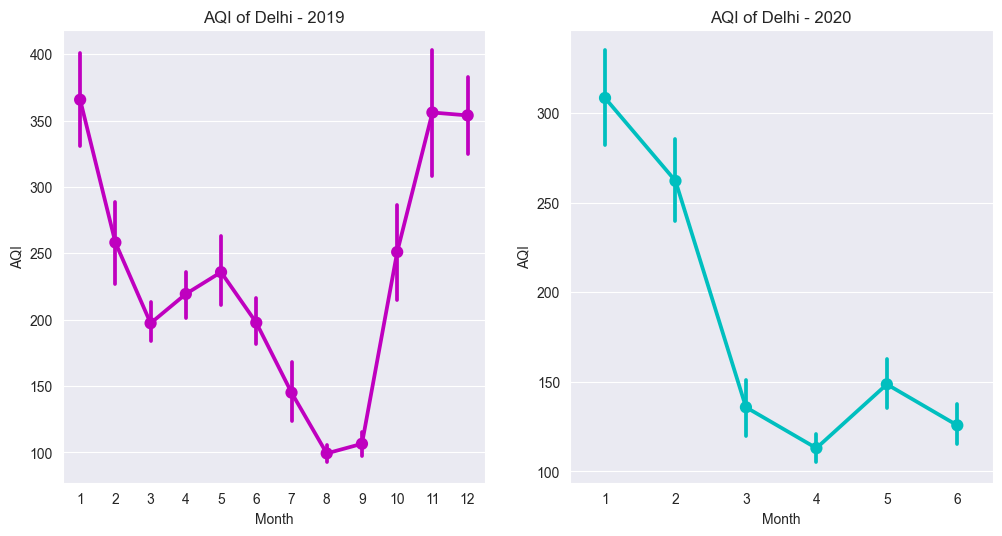

In [65]:
# Let's plot AQI for Delhi
fig,axes = plt.subplots(1,2,figsize=(12,6), dpi=100)
axes[0].set_title('AQI of Delhi - 2019')
axes[1].set_title('AQI of Delhi - 2020')

sns.pointplot(x='Month', y='AQI', data=del_2019,ax= axes[0], color='m')
sns.pointplot(x='Month', y='AQI', data=del_2020, ax=axes[1], color='c');

##### 3.2.6 AQI of Chennai

In [66]:
chn_2019 = AQI_2019[AQI_2019['City'] == 'Chennai']
chn_2019

Date     City    AQI    AQI_Bucket  Year  Month
730  2019-01-01  Chennai  212.0          Poor  2019      1
731  2019-01-02  Chennai  158.0      Moderate  2019      1
732  2019-01-03  Chennai  167.0      Moderate  2019      1
733  2019-01-04  Chennai  192.0      Moderate  2019      1
734  2019-01-05  Chennai  116.0      Moderate  2019      1
...         ...      ...    ...           ...   ...    ...
1090 2019-12-27  Chennai   77.0  Satisfactory  2019     12
1091 2019-12-28  Chennai   65.0  Satisfactory  2019     12
1092 2019-12-29  Chennai   92.0  Satisfactory  2019     12
1093 2019-12-30  Chennai   83.0  Satisfactory  2019     12
1094 2019-12-31  Chennai   84.0  Satisfactory  2019     12

[365 rows x 6 columns]

In [67]:
chn_2020 = AQI_2020[AQI_2020['City'] == 'Chennai']
chn_2020

Date     City    AQI    AQI_Bucket  Year  Month
364 2020-01-01  Chennai   70.0  Satisfactory  2020      1
365 2020-01-02  Chennai   57.0  Satisfactory  2020      1
366 2020-01-03  Chennai   74.0  Satisfactory  2020      1
367 2020-01-04  Chennai   64.0  Satisfactory  2020      1
368 2020-01-05  Chennai   62.0  Satisfactory  2020      1
..         ...      ...    ...           ...   ...    ...
541 2020-06-26  Chennai   95.0  Satisfactory  2020      6
542 2020-06-27  Chennai   95.0  Satisfactory  2020      6
543 2020-06-28  Chennai   98.0  Satisfactory  2020      6
544 2020-06-29  Chennai  104.0      Moderate  2020      6
545 2020-06-30  Chennai  110.0      Moderate  2020      6

[182 rows x 6 columns]

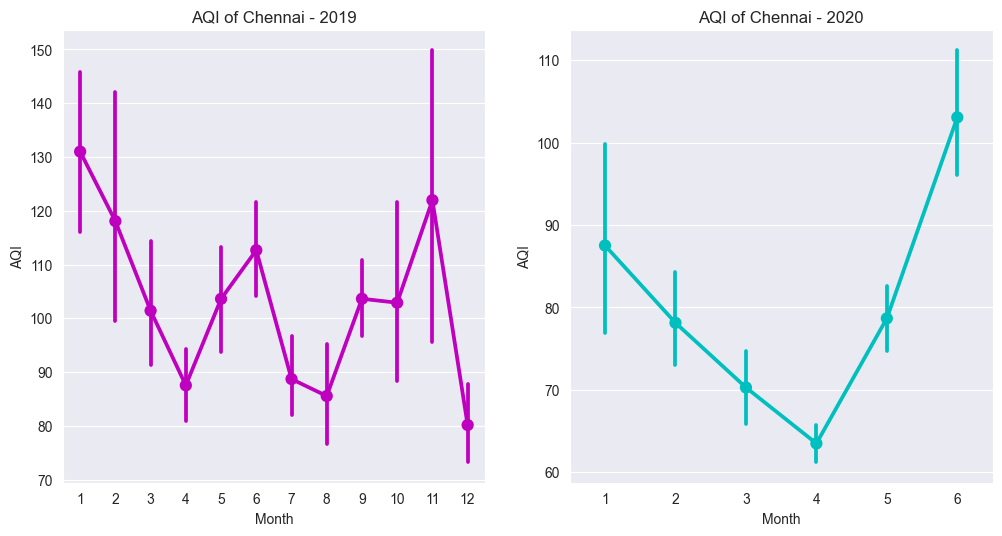

In [68]:
# Let's plot AQI of Chennai
fig,axes = plt.subplots(1,2,figsize=(12,6), dpi=100)
axes[0].set_title('AQI of Chennai - 2019')
axes[1].set_title('AQI of Chennai - 2020')

sns.pointplot(x='Month', y='AQI', data=chn_2019,ax= axes[0], color='m')
sns.pointplot(x='Month', y='AQI', data=chn_2020, ax=axes[1], color='c');

##### 3.2.7 AQI of Patna

In [69]:
pat_2019 = AQI_2019[AQI_2019['City'] == 'Patna']
pat_2019

Date   City    AQI AQI_Bucket  Year  Month
2190 2019-01-01  Patna  539.0     Severe  2019      1
2191 2019-01-02  Patna  568.0     Severe  2019      1
2192 2019-01-03  Patna  524.0     Severe  2019      1
2193 2019-01-04  Patna  501.0     Severe  2019      1
2194 2019-01-05  Patna  520.0     Severe  2019      1
...         ...    ...    ...        ...   ...    ...
2550 2019-12-27  Patna  256.0       Poor  2019     12
2551 2019-12-28  Patna  298.0       Poor  2019     12
2552 2019-12-29  Patna  331.0  Very Poor  2019     12
2553 2019-12-30  Patna  333.0  Very Poor  2019     12
2554 2019-12-31  Patna  364.0  Very Poor  2019     12

[365 rows x 6 columns]

In [70]:
pat_2020 = AQI_2020[AQI_2020['City'] == 'Patna']
pat_2020

Date   City    AQI    AQI_Bucket  Year  Month
1092 2020-01-01  Patna  364.0     Very Poor  2020      1
1093 2020-01-02  Patna  372.0     Very Poor  2020      1
1094 2020-01-03  Patna  356.0     Very Poor  2020      1
1095 2020-01-04  Patna  205.0          Poor  2020      1
1096 2020-01-05  Patna  183.0      Moderate  2020      1
...         ...    ...    ...           ...   ...    ...
1269 2020-06-26  Patna   71.0  Satisfactory  2020      6
1270 2020-06-27  Patna   65.0  Satisfactory  2020      6
1271 2020-06-28  Patna   82.0  Satisfactory  2020      6
1272 2020-06-29  Patna   88.0  Satisfactory  2020      6
1273 2020-06-30  Patna   93.0  Satisfactory  2020      6

[182 rows x 6 columns]

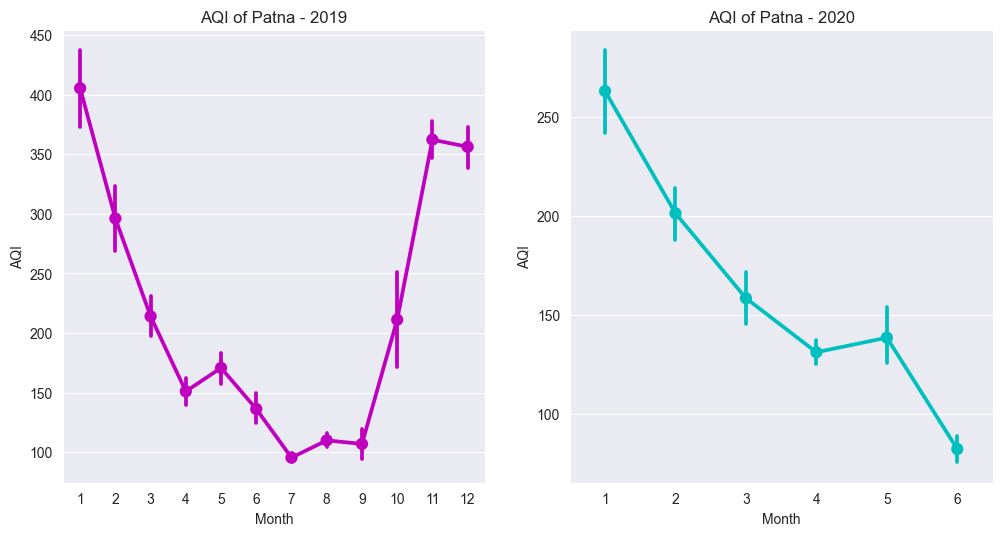

In [71]:
# Let's plot AQI for Patna
fig,axes = plt.subplots(1,2,figsize=(12,6), dpi=100)
axes[0].set_title('AQI of Patna - 2019')
axes[1].set_title('AQI of Patna - 2020')

sns.pointplot(x='Month', y='AQI', data=pat_2019,ax= axes[0], color='m')
sns.pointplot(x='Month', y='AQI', data=pat_2020, ax=axes[1], color='c');